In [1]:
#20240409

In [9]:
import os, sys
#os.getcwd() 현재위치 알려주는 함수
sys.path.append("C:\\Users\\user\\1")

In [11]:
#from dezero.core_simple import Variable
from dezero import Variable

In [37]:
import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

In [38]:
#Sphere 함수
import numpy as np
from dezero import Variable

def sphere(x, y):
    z = x ** 2 + y ** 2
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = sphere(x, y)
z.backward()
print(x.grad, y.grad)

2.0 2.0


In [39]:
#matyas 함수
import numpy as np
from dezero import Variable

def matyas(x, y):
    z = 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = matyas(x, y)
z.backward()
print(x.grad, y.grad)

0.040000000000000036 0.040000000000000036


In [ ]:
'''
*시각화 코드
get_dot_graph 계산 그래프를 시각화하는 함수
'''

-5376.0 8064.0


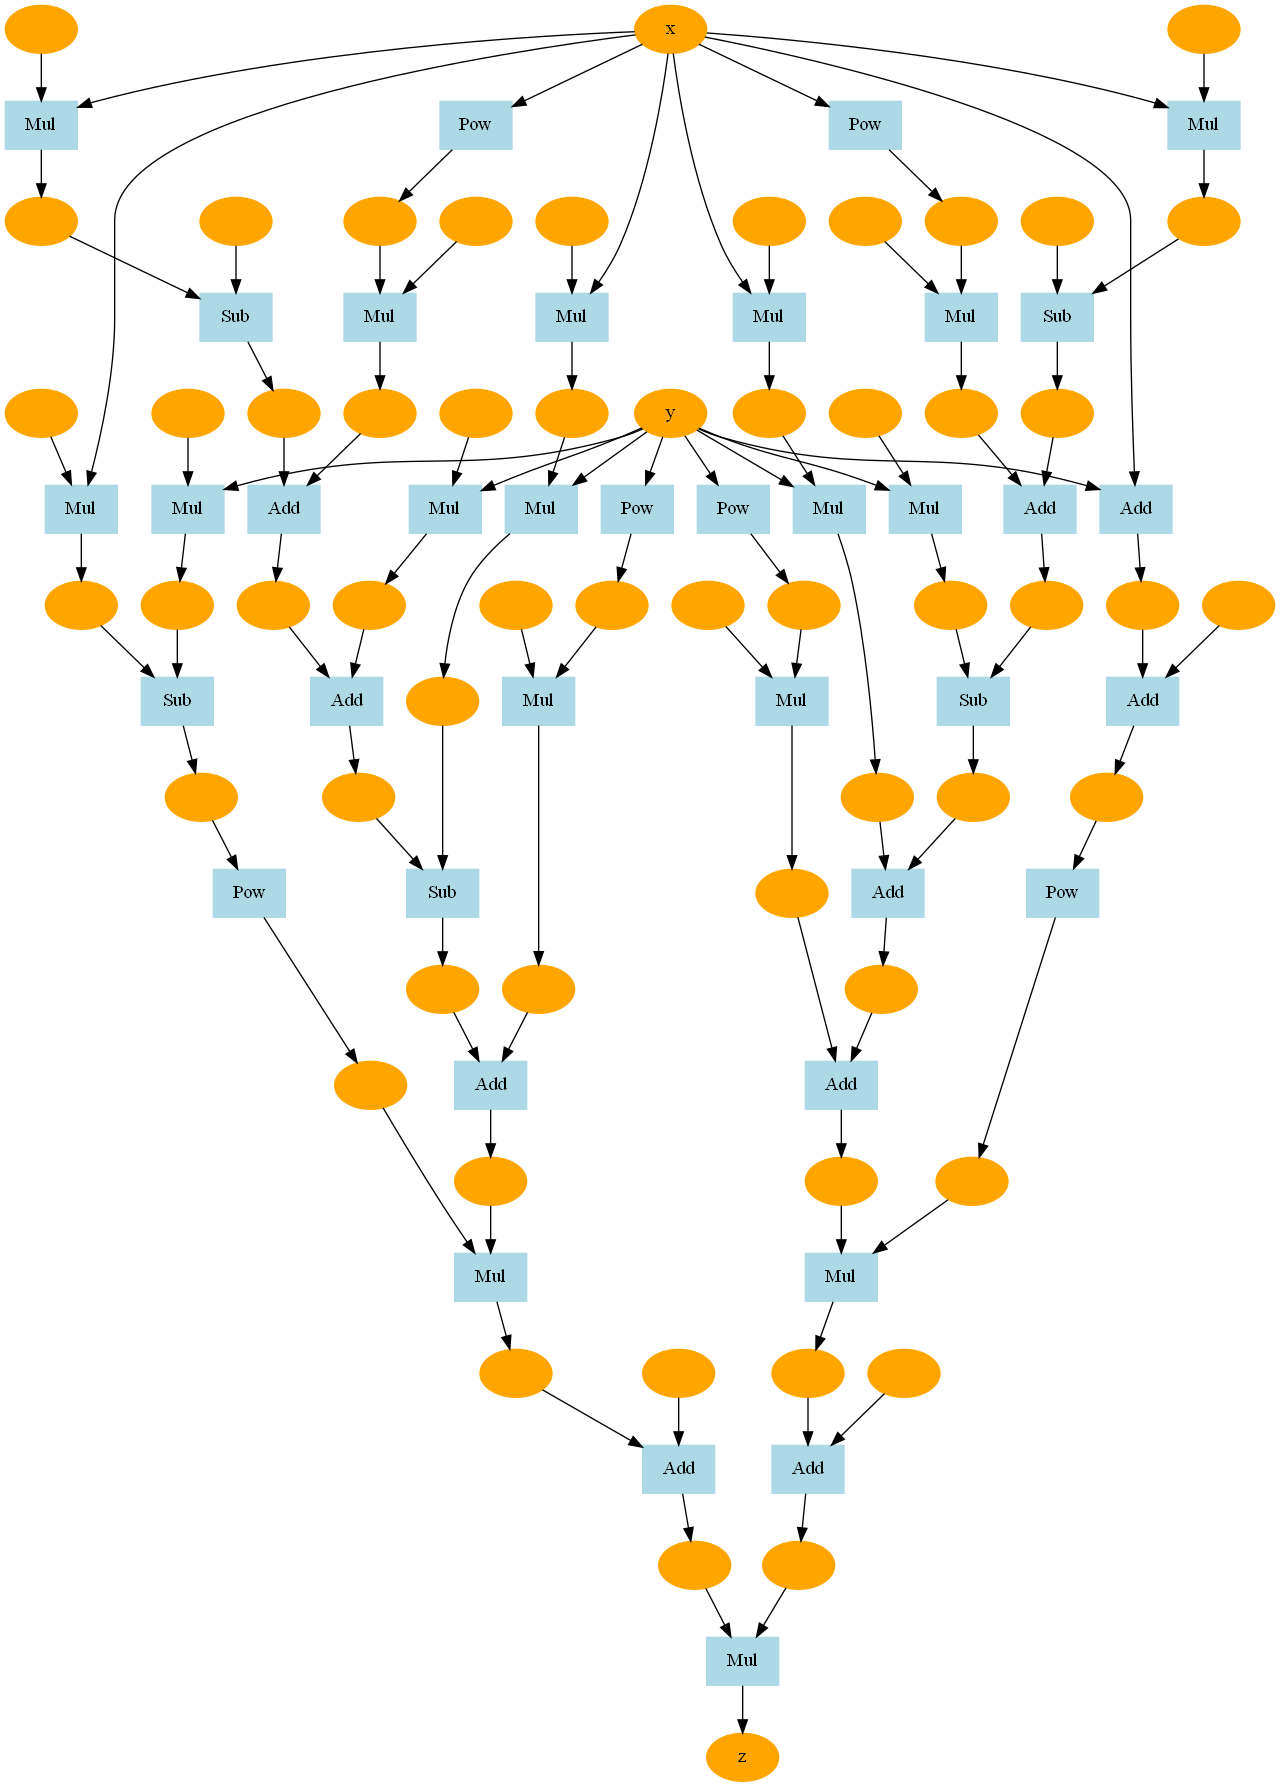

In [40]:
#goldsteim-price 함수
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()
print(x.grad, y.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')

In [41]:
#sin 함수의 미분 =cos함수

import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)




--- original sin ---
0.7071067811865476
0.7071067811865476


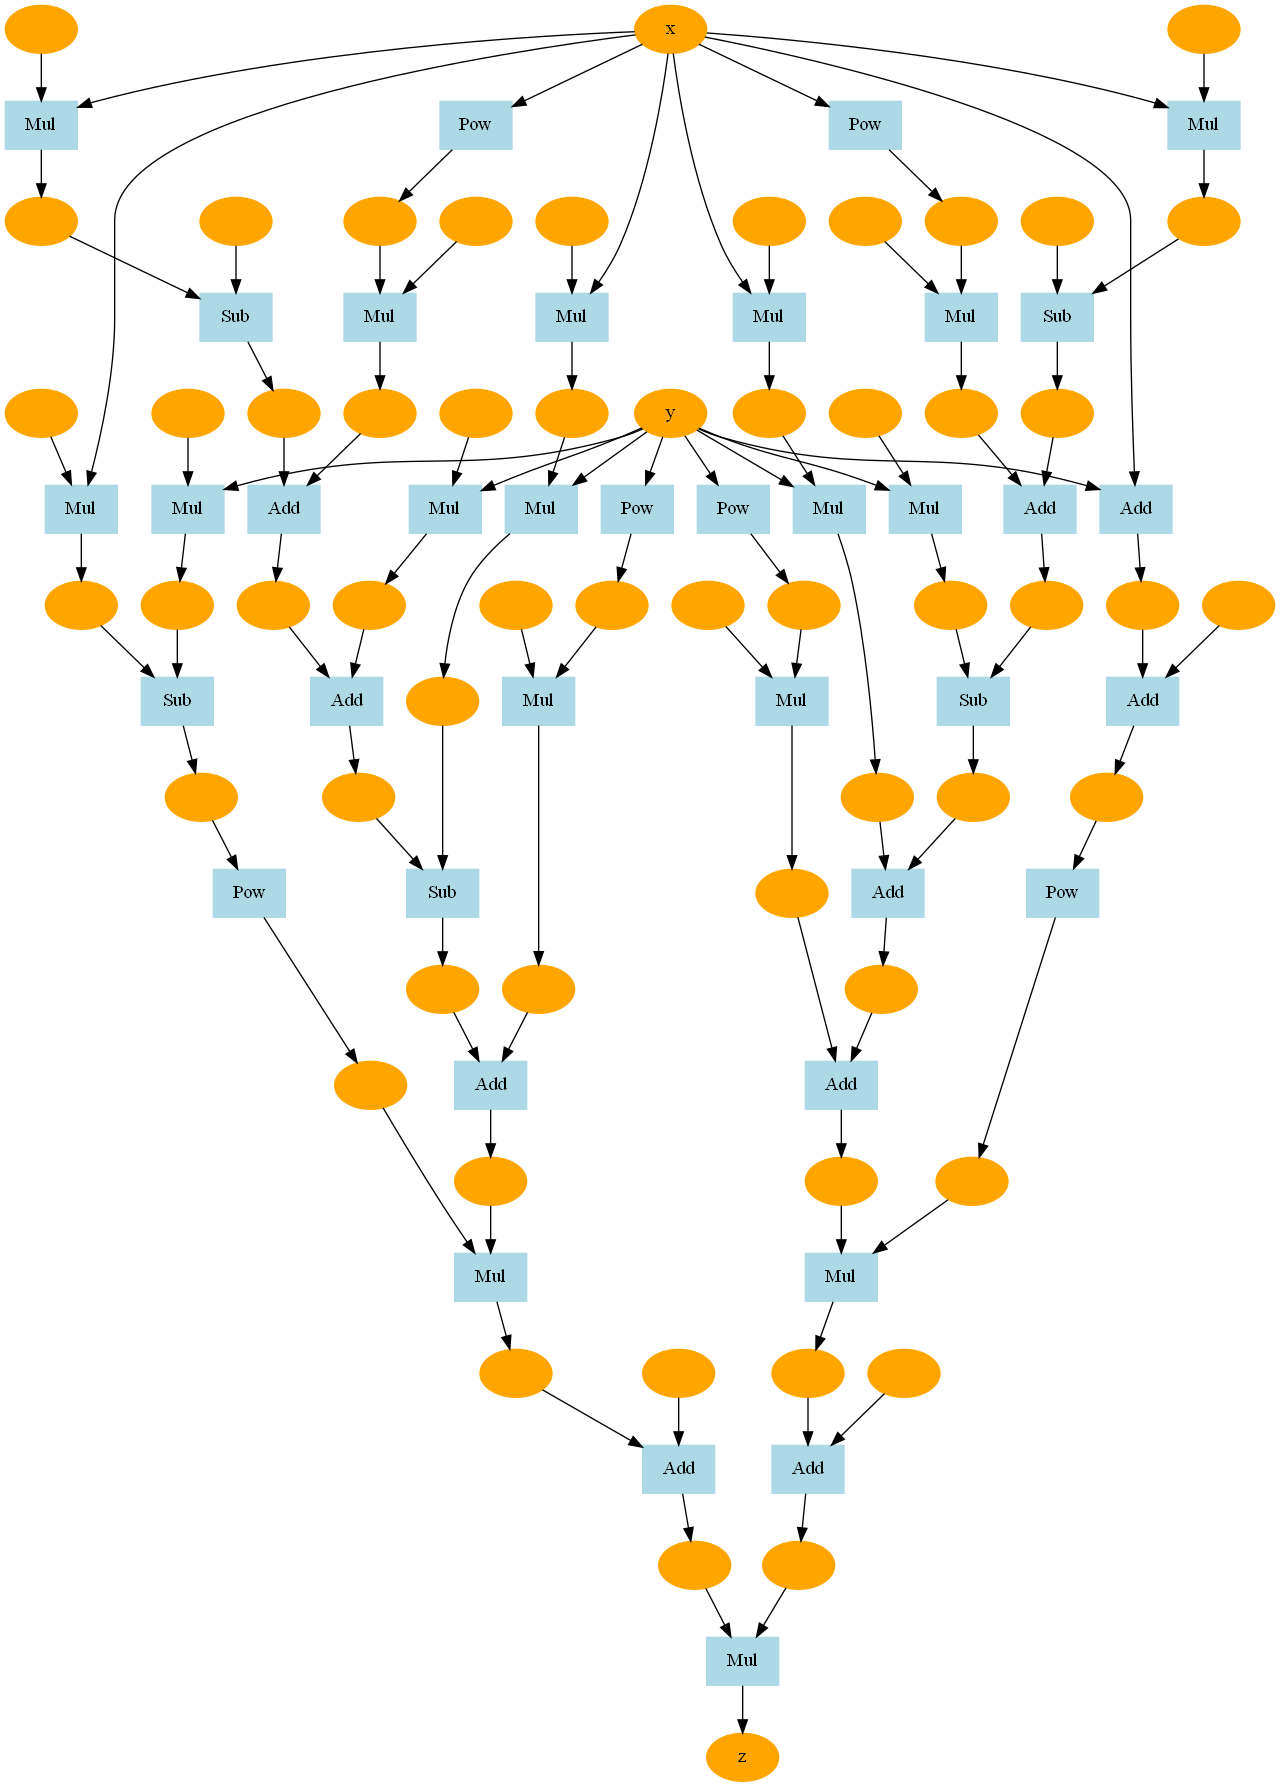

In [42]:
from dezero import Variable

x = Variable(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin ---')
print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein_1.png')

In [ ]:
'''
*테일러 급수 이론

테일러급수: 어떤 함수를 다항식으로 근사하는 방법. (수식생략)
f(x)를 점 a에서 계산해보면 테일러급수가 된다. a는 임의의 값이고 이 항을 무한히 계속되게 되는데
어느 시점에서 중단하면 f(x)의 값을 근사할 수 있게되며 항이 많아질수록 근사의 정확도가 높아진다.
a=0일때의 테일러급수를 매클로린 전개라고 한다. 

'''

In [43]:
#my sin 함수 만들기
import math

def my_sin(x, threshold=0.0001):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


0.7071064695751781
0.7071032148228457


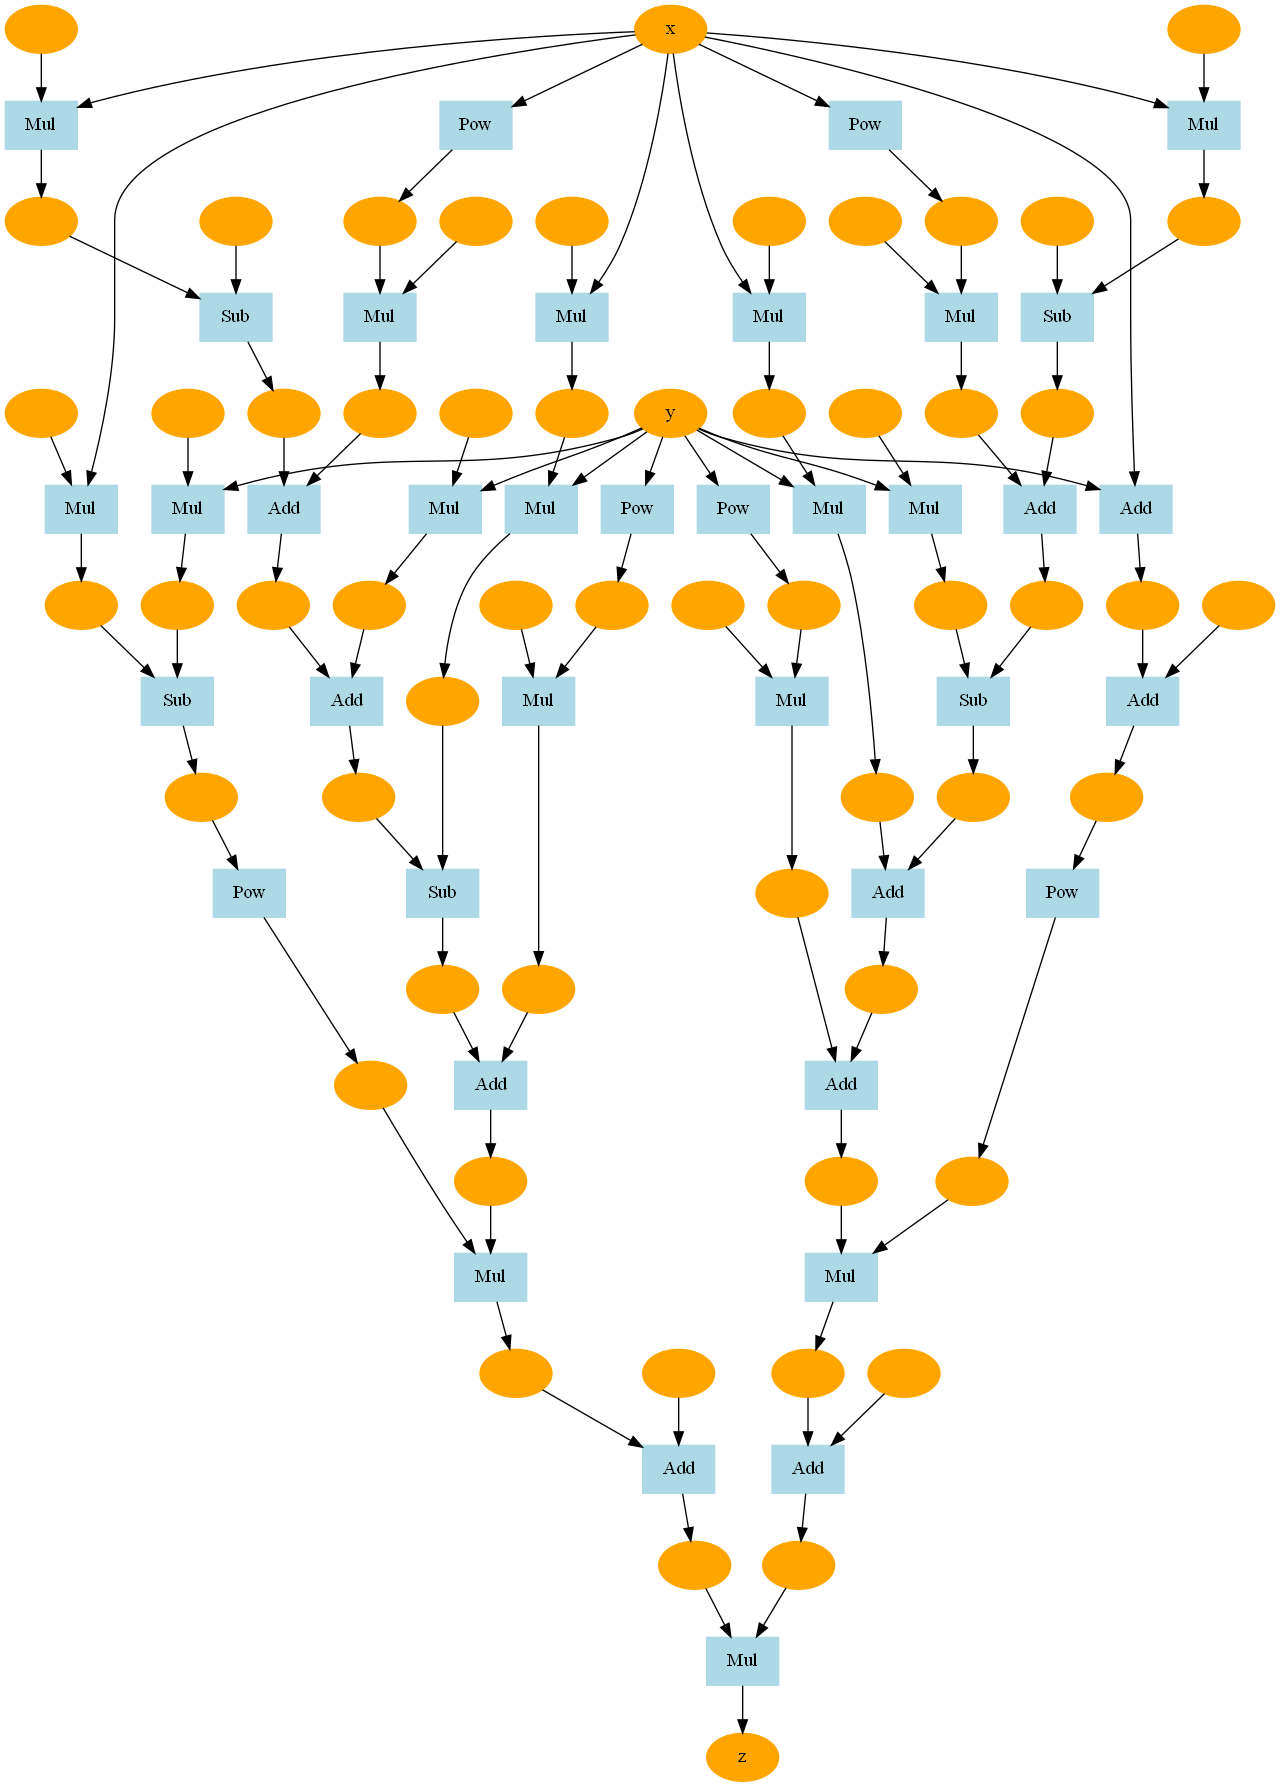

In [44]:
x = Variable(np.array(np.pi / 4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein_2.png')

In [49]:
import math

def my_sin(x, threshold=1e-150):
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Variable(np.array(np.pi / 4))
y = my_sin(x)
y.backward()

print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='goldstein_3.png')

0.7071067811865475
0.7071067811865475


In [46]:
'''
최적화를 배우는 이유: 손실함수를 최소화 시키기 위해서이다.
신경망의 학습 목표도 손실 함수의 출력을 최소화하는 매개변수를 찾는 것이므로 최적화에 속한다.
고로 미분이 가능하면 계속 미분해야한다. 가오리모양처럼 생겼음.

<로젠브록 함수 최적화>
수식: y = 100(𝒙𝟏 − 𝒙𝟎^2)^2 + (1 − 𝒙𝟎)^2
출력이 최소가 되는 𝒙𝟏와 𝒙0을 찾는것이 목표이고 최솟값은 (1.1)이다.  

<경사하강법>
복잡한 형상의 함수라면 기울기가 가리키는 방향에 반드시 최솟값이 존재하지는 않는다.
기울기는 함수의 출력을 가장 크게 하는 방향을 나타낸다. 
기울기 방향으로 일정 거리만큼 이동->다시 기울기를 구하는 작업을 반복하면 최솟값에 접근할지도 모른다.
다만 초깃값이 중요하다. 초깃값을 잘못설정할시 수행시간이 너무 오래걸리거나 결괏값이 나오지 않는 등의 문제가 생긴다.
+ 골짜기가 길게 뻗은 함수에서 잘 대응하지 못한다(ex.로젠블록 함수)
이를 보완하기위해 제시되는 것이 뉴턴방법.

<뉴턴방법>(수동계산)
경사하강법은 경사하강법은 계곡에서 서서히 최솟값에 접근하므로 수렴이 느리다는 단점이 있음
뉴턴 방법은 계곡을 뛰어넘어 단번에 목적지에 도착하므로 최적화하면 더 적은 단계로 최적의 결과를 얻을 가능성이 높음
(같은 로젠브록 함수를 기준으로 경사하강법은 5만번, 뉴턴 방법은 6회 갱신만에 도달함)
갱신 횟수는 초깃값이나 학습률 등의 설정에 따라 크게 좌우됨
일반적으로 초깃값이 정답에 충분히 가까우면 뉴턴 방법이 더 빨리 수렴함

뉴턴방법의 최적화원리
- y = f(x) 라는 함수의 최솟값을 구하는것
테일러 급수에 따라 y = f(x) 를 변환하면 어떤 점 a를 기점으로 f를 x의 다항식으로 나타낼 수 있음.
어느 시점에서 증가를 중단하면 f(x)를 근사적으로 나타낼 수 있다.
물리 세계로 비유하면 경사 하강법은 속도 정보만 사용하고 뉴턴은 속도와 가속도 정보를 사용한다.

'''

'\n최적화를 배우는 이유: 손실함수를 최소화 시키기 위해서이다.\n신경망의 학습 목표도 손실 함수의 출력을 최소화하는 매개변수를 찾는 것이므로 최적화에 속한다.\n고로 미분이 가능하면 계속 미분해야한다. 가오리모양처럼 생겼음.\n\n<로젠브록 함수 최적화>\n수식: y = 100(𝒙𝟏 − 𝒙𝟎^2)^2 + (1 − 𝒙𝟎)^2\n출력이 최소가 되는 𝒙𝟏와 𝒙0을 찾는것이 목표이고 최솟값은 (1.1)이다.  \n\n<경사하강법>\n복잡한 형상의 함수라면 기울기가 가리키는 방향에 반드시 최솟값이 존재하지는 않는다.\n기울기는 함수의 출력을 가장 크게 하는 방향을 나타낸다. \n기울기 방향으로 일정 거리만큼 이동->다시 기울기를 구하는 작업을 반복하면 최솟값에 접근할지도 모른다.\n다만 초깃값이 중요하다. 초깃값을 잘못설정할시 수행시간이 너무 오래걸리거나 결괏값이 나오지 않는 등의 문제가 생긴다.\n\n'